## 3주차 미션 소개 -  피처 엔지니어링(Feature Engineering)

* 피처 엔지니어링(Feature Engineering)은 머신러닝 모델을 훈련시키기 위해 입력 데이터로 사용되는 피처(또는 변수)들을 가공하거나 새로운 피처를 만들어내는 과정을 말합니다. 피처 엔지니어링은 머신러닝 성능을 향상시키고 모델의 일반화 성능을 향상시키는 데 핵심적인 역할을 합니다. 현실 세계의 데이터는 종종 불완전하고 노이즈가 많습니다. 결측값, 이상치, 오류 등이 있을 수 있습니다. 종속 변수와의 관계를 강화하고 모델이 더 나은 예측을 할 수 있도록 도와줍니다. 예를 들어, 특정 도메인 지식을 활용하여 새로운 피처를 생성하거나 기존 피처를 변형시켜 모델이 패턴을 더 잘 파악하도록 할 수 있습니다. 불필요한 피처를 제거하거나 피처를 효과적으로 변형함으로써 모델의 계산 효율성을 높일 수 있습니다. 이는 모델을 더 빠르게 훈련시키고 실행시킬 수 있습니다.

* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df = df.dropna()

## 미션 1) - 수치형 변수를 범주형 변수로 만들기

* 월별 지불 금액을 그룹화하여 지불 금액 구간별 경향성을 분석할 수 있습니다. 이러한 수치형 데이터의 범주화는 수치형 데이터에 이상치가 있을 경우, 이를 구간화함으로써 이상치의 영향을 줄일 수 있습니다. 범주화된 데이터는 일반적으로 이해하기 쉽습니다. 그리고 모델이 특정 수치에 과도하게 적합되는 것을 방지할 수 있습니다. 수치형 데이터를 구간으로 나눔으로써 모델이 데이터의 일반적인 패턴을 학습하는 데 집중하도록 할 수 있습니다. 범주화된 데이터는 시각화 및 보고서 작성 시 직관적이고 명확한 정보 전달이 가능합니다. 데이터의 분포, 추세 등을 파악하기에 용이합니다. 데이터의 분포가 불균일할 때, 구간화를 통해 각 범주 내 데이터의 분포를 보다 균일하게 만들 수 있습니다. 위와 같은 이유로 수치형 변수를 범주화 하는 미션을 진행해 보겠습니다.

* 수치형 변수를 범주형 변수로 변환합니다.
* MonthlyCharges 를 4개의 구간으로 나눕니다. 구간을 나누는 기준은 시각화 내용을 바탕으로 정하며 기준에 대한 정답이 있지는 않습니다. 구간을 정한 기준을 설명으로 작성하고 구간을 나누는 코드를 작성해 주세요.

* 다음과 같이 원본과 구간을 나눈 데이터를 비교해 주세요. 기준이 정해져 있지 않으며 정답이 없으니 자율적으로 나눠 보세요.

| customerID   |   MonthlyCharges | monthlycharges_group   |
|:-------------|-----------------:|:-----------------------|
| 7590-VHVEG   |            29.85 | 0-30                   |
| 5575-GNVDE   |            56.95 | 30-70                  |
| 3668-QPYBK   |            53.85 | 30-70                  |
| 7795-CFOCW   |            42.3  | 30-70                  |
| 9237-HQITU   |            70.7  | 70-99                  |

<table>
    <tr>
        <td><img src="https://i.imgur.com/Tiub25Z.png" width="300"></td>
        <td><img src="https://i.imgur.com/7iGsGPB.png" width="300"></td>
    </tr>
</table>

In [ ]:
# 여기에 코드를 입력해 주세요.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: >

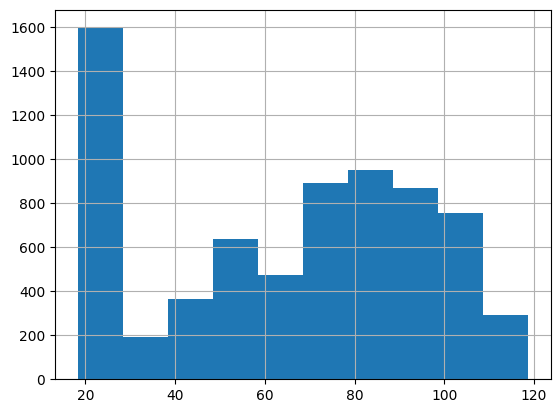

In [ ]:
df["MonthlyCharges"].hist()

## 2가지 경우 시도

1) 위의 제 1사분위, 2사분위, 3사분위 들을 이용하면 같은 개수가 나오므로 (max 값 - min 값) / 4 를 이용해 구간 나누기

2) 위의 히스토그램에 나타나있는 x축을 이용해 간단하게
0 - 120 을 4구간으로 나누기

In [ ]:
# 1번 - 최솟값과 최댓값의 차를 4구간으로 나누기
charge_max = 118.750000
charge_min = 18.250000

space = (charge_max - charge_min) / 4
space

25.125

In [ ]:
# 구간에 맞추어 나누기
df["Charge_1"] = df["MonthlyCharges"] < (charge_min + space)
df["Charge_2"] = (df["MonthlyCharges"] >= space) & (df["MonthlyCharges"] <= (charge_min + 2*space))
df["Charge_3"] = (df["MonthlyCharges"] >= 2*space) & (df["MonthlyCharges"] <= (charge_min + 3*space))
df["Charge_4"] = df["MonthlyCharges"] > (charge_min + 3*space)
df[["MonthlyCharges","Charge_1","Charge_2","Charge_3","Charge_4"]].head()

,MonthlyCharges,Charge_1,Charge_2,Charge_3,Charge_4
customerID,,,,,
7590-VHVEG,29.85,True,True,False,False
5575-GNVDE,56.95,False,True,True,False
3668-QPYBK,53.85,False,True,True,False
7795-CFOCW,42.30,True,True,False,False
9237-HQITU,70.70,False,False,True,False


In [ ]:
# 하나의 컬럼에 넣어주기
df["MonthlyCharges_split_1"] = df[["Charge_1","Charge_2","Charge_3","Charge_4"]].idxmax(axis=1)
df[["MonthlyCharges","MonthlyCharges_split_1"]].head()

,MonthlyCharges,MonthlyCharges_split_1
customerID,,
7590-VHVEG,29.85,Charge_1
5575-GNVDE,56.95,Charge_2
3668-QPYBK,53.85,Charge_2
7795-CFOCW,42.30,Charge_1
9237-HQITU,70.70,Charge_3


<Axes: xlabel='MonthlyCharges_split_1', ylabel='count'>

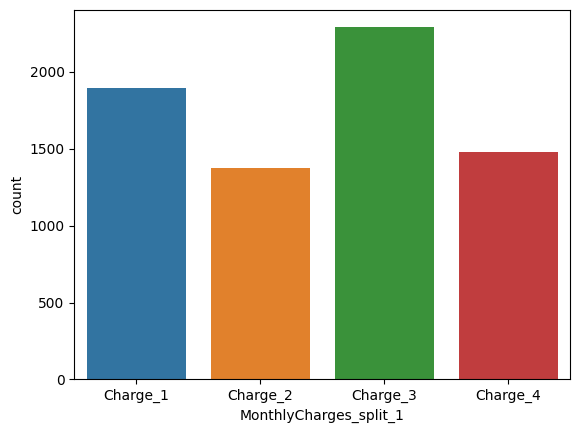

In [ ]:
# 1번 경우의 countplot 결과
MonthlyCharges_order = ["Charge_1","Charge_2","Charge_3","Charge_4"]
sns.countplot(data=df, x='MonthlyCharges_split_1',hue="MonthlyCharges_split_1",order=MonthlyCharges_order)

In [ ]:
# 2번 - 0~120을 4구간으로 나눠보기
# 구간에 맞추어 나누기
df["0-30"] = df["MonthlyCharges"] < 30
df["30-60"] = (df["MonthlyCharges"] >= 30) & (df["MonthlyCharges"] <= 60)
df["60-90"] = (df["MonthlyCharges"] >= 60) & (df["MonthlyCharges"] <= 90)
df["90-120"] = df["MonthlyCharges"] > 90
df[["MonthlyCharges","0-30","30-60","60-90","90-120"]].head()

,MonthlyCharges,0-30,30-60,60-90,90-120
customerID,,,,,
7590-VHVEG,29.85,True,False,False,False
5575-GNVDE,56.95,False,True,False,False
3668-QPYBK,53.85,False,True,False,False
7795-CFOCW,42.30,False,True,False,False
9237-HQITU,70.70,False,False,True,False


In [ ]:
# 하나의 컬럼에 넣어주기
df["MonthlyCharges_split_2"] = df[["0-30","30-60","60-90","90-120"]].idxmax(axis=1)
df[["MonthlyCharges","MonthlyCharges_split_2"]].head()

,MonthlyCharges,MonthlyCharges_split_2
customerID,,
7590-VHVEG,29.85,0-30
5575-GNVDE,56.95,30-60
3668-QPYBK,53.85,30-60
7795-CFOCW,42.30,30-60
9237-HQITU,70.70,60-90


<Axes: xlabel='MonthlyCharges_split_2', ylabel='count'>

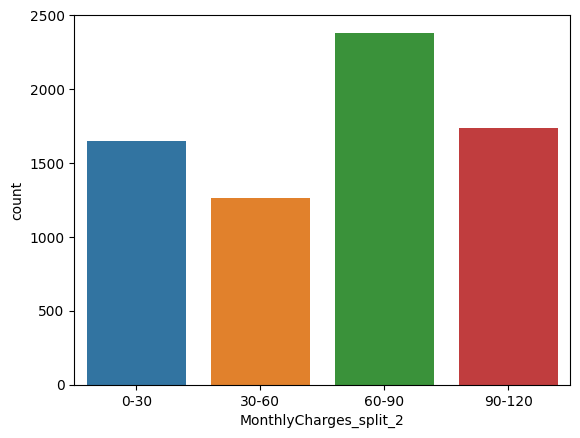

In [ ]:
# 2번 경우의 countplot 결과
MonthlyCharge_order = ["0-30","30-60","60-90","90-120"]
sns.countplot(data=df, x='MonthlyCharges_split_2',hue="MonthlyCharges_split_2",order=MonthlyCharge_order)

* 1번과 2번은 어떻게 보면 비슷한 수로 나눠질 것 이라고 가설을 세우고 시작했다.
역시나 비슷한 결과가 나타난 것을 알 수 있다.

## 미션 2) - One-Hot-Encoding 하기

* One-Hot Encoding은 범주형 데이터를 머신러닝 모델이 이해할 수 있는 형태로 변환하는 기술 중 하나입니다. One-Hot Encoding을 사용하면 각 범주 간의 거리가 동일하게 유지됩니다. 즉, 범주 간의 유사성을 측정할 때 각 범주가 동일한 거리로 취급되므로 모델이 범주 간의 관계를 더 정확하게 학습할 수 있습니다. One-Hot Encoding은 범주의 수에 따라 적절한 차원을 생성하므로 데이터가 새로운 범주로 확장되거나 변할 때 모델이 쉽게 일반화될 수 있습니다. 각 범주가 독립된 차원으로 표현되므로, 모델의 예측이나 특성 중요도를 해석할 때 각 범주에 대한 기여를 명확하게 파악할 수 있습니다. 라벨 인코딩과 같은 다른 방법들이 범주 간의 임의의 순서를 생성할 수 있는 반면, One-hot encoding은 이러한 문제를 방지하고 모델이 데이터를 오해하는 것을 막습니다. 하지만, One-hot encoding은 범주의 수가 매우 많을 때 차원의 저주(curse of dimensionality)를 초래하거나, 데이터가 희소해질 수 있으므로 적용 시 이러한 점을 고려해야 합니다. 다음의 예시처럼 데이터를 One-Hot-Encoding 해주세요.

<img src="https://i.imgur.com/9Njm4aN.png">

| customerID   |   SeniorCitizen |   tenure |   TotalCharges |   gender_Female |   gender_Male |   Partner_No |   Partner_Yes |   Dependents_No |   Dependents_Yes |   PhoneService_No |
|:-------------|----------------:|---------:|---------------:|----------------:|--------------:|-------------:|--------------:|----------------:|-----------------:|------------------:|
| 7590-VHVEG   |               0 |        1 |          29.85 |               1 |             0 |            0 |             1 |               1 |                0 |                 1 |
| 5575-GNVDE   |               0 |       34 |        1889.5  |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 3668-QPYBK   |               0 |        2 |         108.15 |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 7795-CFOCW   |               0 |       45 |        1840.75 |               0 |             1 |            1 |             0 |               1 |                0 |                 1 |
| 9237-HQITU   |               0 |        2 |         151.65 |               1 |             0 |            1 |             0 |               1 |                0 |                 0 |


In [ ]:
# 현재 데이터프레임 확인
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Charge_1,Charge_2,Charge_3,Charge_4,MonthlyCharges_split_1,0-30,30-60,60-90,90-120,MonthlyCharges_split_2
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,True,True,False,False,Charge_1,True,False,False,False,0-30
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,False,True,True,False,Charge_2,False,True,False,False,30-60
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,False,True,True,False,Charge_2,False,True,False,False,30-60
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,True,True,False,False,Charge_1,False,True,False,False,30-60
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,False,False,True,False,Charge_3,False,False,True,False,60-90


In [ ]:
# 2번 문제 전에, 처음 구간을 위해 만든 컬럼을 지우기
df.drop('Charge_1', axis=1, inplace=True)
df.drop('Charge_2', axis=1, inplace=True)
df.drop('Charge_3', axis=1, inplace=True)
df.drop('Charge_4', axis=1, inplace=True)
df.drop('0-30', axis=1, inplace=True)
df.drop('30-60', axis=1, inplace=True)
df.drop('60-90', axis=1, inplace=True)
df.drop('90-120', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_split_1,MonthlyCharges_split_2
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Charge_1,0-30
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Charge_2,30-60
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Charge_2,30-60
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Charge_1,30-60
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Charge_3,60-90


In [ ]:
# 여기에 one-hot-encoding 을 구현해 주세요.
# 원핫인코딩을 위해 get_dummies를 사용해서 예를 들어 gender 컬럼에서 Female이 0, male이 1을 나타내도록 만들기

df_example = df[['SeniorCitizen','tenure','TotalCharges','gender','Partner','Dependents','PhoneService']]

df_encoded = pd.get_dummies(df_example, columns=['gender','Partner','Dependents','PhoneService'],
                              prefix=['gender','Partner','Dependents','PhoneService'])
df_encoded.head(5)

,SeniorCitizen,tenure,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes
customerID,,,,,,,,,,,
7590-VHVEG,0,1,29.85,1,0,0,1,1,0,1,0
5575-GNVDE,0,34,1889.50,0,1,1,0,1,0,0,1
3668-QPYBK,0,2,108.15,0,1,1,0,1,0,0,1
7795-CFOCW,0,45,1840.75,0,1,1,0,1,0,1,0
9237-HQITU,0,2,151.65,1,0,1,0,1,0,0,1


## 미션 3) - 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가해 주세요.

* 이 미션은 데이터 전처리와 피처 엔지니어링의 중요성을 이해하고, 실제 비즈니스 문제에 적용할 수 있는 머신러닝 모델을 개발하는 데 중점을 둡니다. 통신사 고객 데이터를 활용하여 고객의 이탈 여부를 예측하는 머신러닝 모델을 개발하고, 여러 피처 엔지니어링 기법을 적용하여 모델의 정확도(Accuracy)를 높여보세요. 고객 이탈 여부 예측은 통신사에 있어 중요한 비즈니스 문제로, 고객 유지 전략 수립에 큰 영향을 미칩니다.

* 피처엔지니어링을 진행하고 모델의 성능을 평가합니다.
* 모델은 트리계열 모델 외 다른 모델을 사용해도 됩니다.


### 3번 문제 실행시 2번 문제를 실행하면 안됩니다!(컬럼 드랍)

<Axes: >

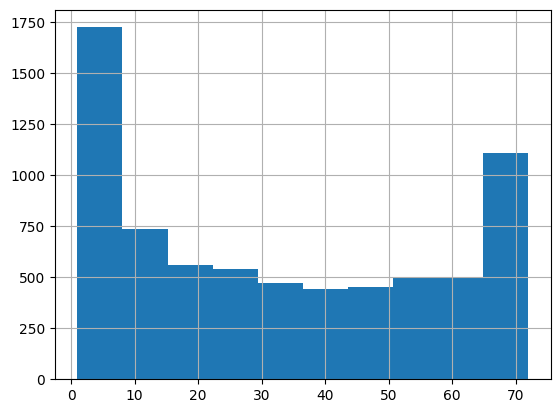

In [ ]:
df["tenure"].hist()

In [ ]:
df_churn = df
df_churn['BinaryChurn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})
df_churn['BinaryChurn']

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: BinaryChurn, Length: 7032, dtype: int64

In [ ]:
# 데이터 전처리
df_train = df
df_train = pd.get_dummies(df_train, columns=['gender','Partner','Dependents','PhoneService','Contract','InternetService','MultipleLines','PaymentMethod'],
                              prefix=['gender','Partner','Dependents','PhoneService','Contract','InternetService','MultipleLines','PaymentMethod'])

df_train["tenure_short"] = df_train["tenure"] < 10
df_train["tenure_middle"] = (df_train["tenure"] >= 10) & (df_train["tenure"] <= 60)
df_train["tenure_long"] = (df_train["tenure"] >= 60)

df_train.drop('MonthlyCharges_split_1', axis=1, inplace=True)
df_train.drop('MonthlyCharges_split_2', axis=1, inplace=True)
df_train.drop('StreamingTV', axis=1, inplace=True)
df_train.drop('StreamingMovies', axis=1, inplace=True)
df_train.drop('PaperlessBilling', axis=1, inplace=True)
df_train.drop('DeviceProtection', axis=1, inplace=True)
df_train.drop('TechSupport', axis=1, inplace=True)
df_train.drop('OnlineSecurity', axis=1, inplace=True)
df_train.drop('OnlineBackup', axis=1, inplace=True)
# df_train.drop('Charge_1', axis=1, inplace=True)
# df_train.drop('Charge_2', axis=1, inplace=True)
# df_train.drop('Charge_3', axis=1, inplace=True)
# df_train.drop('Charge_4', axis=1, inplace=True)
df_train.drop('Churn', axis=1, inplace=True)
df_train.drop('BinaryChurn', axis=1, inplace=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Charge_1                                 7032 non-null   bool   
 5   Charge_2                                 7032 non-null   bool   
 6   Charge_3                                 7032 non-null   bool   
 7   Charge_4                                 7032 non-null   bool   
 8   0-30                                     7032 non-null   bool   
 9   30-60                                    7032 non-null   bool   
 10  60-90                                 

In [ ]:
df_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Charge_1,Charge_2,Charge_3,Charge_4,0-30,30-60,...,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_short,tenure_middle,tenure_long
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,True,True,False,False,True,False,...,0,1,0,0,0,1,0,True,False,False
5575-GNVDE,0,34,56.95,1889.50,False,True,True,False,False,True,...,1,0,0,0,0,0,1,False,True,False
3668-QPYBK,0,2,53.85,108.15,False,True,True,False,False,True,...,1,0,0,0,0,0,1,True,False,False
7795-CFOCW,0,45,42.30,1840.75,True,True,False,False,False,True,...,0,1,0,1,0,0,0,False,True,False
9237-HQITU,0,2,70.70,151.65,False,False,True,False,False,False,...,1,0,0,0,0,1,0,True,False,False


In [ ]:
X = df_train
y = df_churn['BinaryChurn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42)

In [ ]:
# 여기에 모델을 구현해 주세요.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
# 위에서 만든 모델로 학습과 예측을 진행해 주세요.
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

72.52044081052257

In [ ]:
model.score(X_test,y_test)

0.7252044081052257